# Entering the Movie Production Business - Data Analysis

**Authors:** Ruthy Yao
***

# Overview

The movie industry is recovering from the Covid-19 pandemic with the cinema attendance picking up steadily and the box-office chasing the high of the pre-pandemic level. Miscrosoft,entrenched in the gaming and entertainemnt business, is looking to step into studio and movie production. The project delves into the well-konwn movie databases such as IMDB, Box Office Mojo, etc., using description analysis to distill the insights around genres selection, financial viability and release month to prepare Miscosoft for the launch of its new studio.

## Business Problem

The project is trying to help Miscrosfot to discover the insights on three key success factors: 
* Genres selection - What type of movie is most successful from popularity and box office perspective?   
* Budget/Profit - How much budget/ funding need to be allocated to the studio business and how much profit can be expected? This piece of analysis will look at the current studios year-over-year performance.
* Release month - What is the best months to release a movie?

Answering those questions will pave a foundation for the new studio. Miscosoft can use the insights to prepare the launch of the first movie. In addition, by putting them into a peer comparision with the word's most successful studios, it will help Miscosoft to develop a solid grand budget. Finally, the insight on timing of the release will assist with the studio's annual production plan.  


***


## Data Understanding

The data I chose come from four well-known movie database:
* IMDB
* The numbers
* The Movie DataBase
* Box Office Mojo

Those database, once combined will give a large dataset of over 2800 movie titles. It will also presents the key variables of a movie including the genres, rating scores, gross revenue and production budget, release date and the studios, which will serve the purpose of the analysis.   


***

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_movie = pd.read_csv('data/genre_popularity_rev_studio')

In [4]:
df_movie.head()

,Unnamed: 0,title,genres,popularity,vote_average,release_date,production_budget,worldwide_gross,profit,studio,release_year,release_month
0,0,How to Train Your Dragon,"Action,Adventure,Animation",28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW,2010,3
1,1,Iron Man 2,"Action,Adventure,Sci-Fi",28.515,6.8,2010-05-07,170000000,621156389,140578194.5,Par.,2010,5
2,2,Inception,"Action,Adventure,Sci-Fi",27.920,8.3,2010-07-16,160000000,835524642,257762321.0,WB,2010,7
3,3,Toy Story 3,"Adventure,Animation,Comedy",24.445,7.7,2010-06-17,200000000,1068879522,334439761.0,BV,2010,6
4,4,Despicable Me,"Animation,Comedy,Family",23.673,7.2,2010-07-09,69000000,543464573,202732286.5,Uni.,2010,7


## Data Preparation

I took the following steps to prepare the data: 

1. Read the source datatables and identify the variables that will be used for the analysis. Sometimes, there are more than one datatables that have the variables I need. In this situaion, I chose the datatbale based on two principles: 1) larger dataset over small ones to ensure the sample size is big enough for the analysis; 2) dataset that possesses multiple variables over dataset with only one ddesirable variable to minimzie the merge/consolidation. 
***
2. Merge/join the datatables to consoldiate the variables into one dataframe. I consolidated four datatables - the movie basics from IMDB, the movies with the popularity and voting scores from the Movies Data Base, the gross revenue and budget datatable from the Numbers and finally the Box Office Mojo datatable that has the studio data.
***
3. Clean the data either before or after the merge/join. This invovles converting the data type, removing the irrelevant columns, creating new columns using map syntax and lambda function.

***
4. Deal with the rows with missing value - when there are missing values in certain rows, in most situations, I remove them from the dataframe with two considerations - 1) the size the missing-value rows - after removing them, will the dataset still representative of the whole movie population; 2) Is it approriate to fill in the missing value using an estimate?

For further details on the data preparation, please refer to the  Jupyter Notebook Data Cleaning. 
***

## Data Analysis



## Analysis I - which are the best genres to choose?

My hypothesis is that movie popularity score and box office are two indicators of movie success.  

To test my hypothesis, I will run two correlation analyses: 
1) Between the movie's average vote and the popularity score;
2) between the movie's average vote and the worldwide gross revenue. 

The dataframe shows that most movies fit into more than one genre. Hence I need to transform the data into multiple rows with each row having only one value in the genres column.

In [5]:
df_movie_explode = df_movie.copy()

In [6]:
# split the genres into a list
df_movie_explode['genres']=df_movie['genres'].str.split(pat=',',expand = False)

In [7]:
# explode the genres list into multiple rows
df_movie_explode=df_movie_explode.explode('genres')

In [8]:
df_movie_explode.head()

,Unnamed: 0,title,genres,popularity,vote_average,release_date,production_budget,worldwide_gross,profit,studio,release_year,release_month
0,0,How to Train Your Dragon,Action,28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW,2010,3
0,0,How to Train Your Dragon,Adventure,28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW,2010,3
0,0,How to Train Your Dragon,Animation,28.734,7.7,2010-03-26,165000000,494870992,82435496.0,P/DW,2010,3
1,1,Iron Man 2,Action,28.515,6.8,2010-05-07,170000000,621156389,140578194.5,Par.,2010,5
1,1,Iron Man 2,Adventure,28.515,6.8,2010-05-07,170000000,621156389,140578194.5,Par.,2010,5


Draw a scatter chart to examine the correlation between vote score and popularity.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

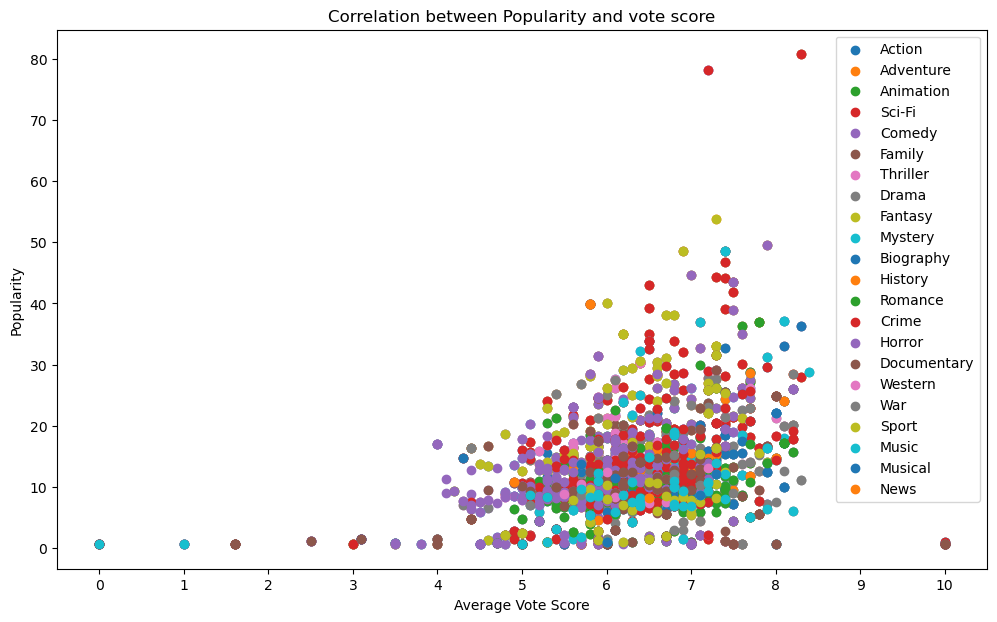

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
for genres in df_movie_explode['genres'].unique():
    subset_df = df_movie_explode[df_movie_explode['genres'] == genres]
    x = subset_df['vote_average']
    y = subset_df['popularity']
    
    ax.scatter(x,y)

    
ax.set_xlabel('Average Vote Score')
ax.set_ylabel('Popularity')
ax.set_xticks(np.arange(0,11,1))
ax.set_title('Correlation between Popularity and vote score')
ax.legend(df_movie_explode['genres'].unique());

The scatter chart demonstrates that there is an correlation between the vote score and popularity and the correlation is stronger when the movie vote score is between 4 and 8.5, which is also the range where the majority of the movies scored in. We can confidently use popularity score as a measure for the genre's success.

Draw a scatter chart to examine the correlation between vote score and box office.

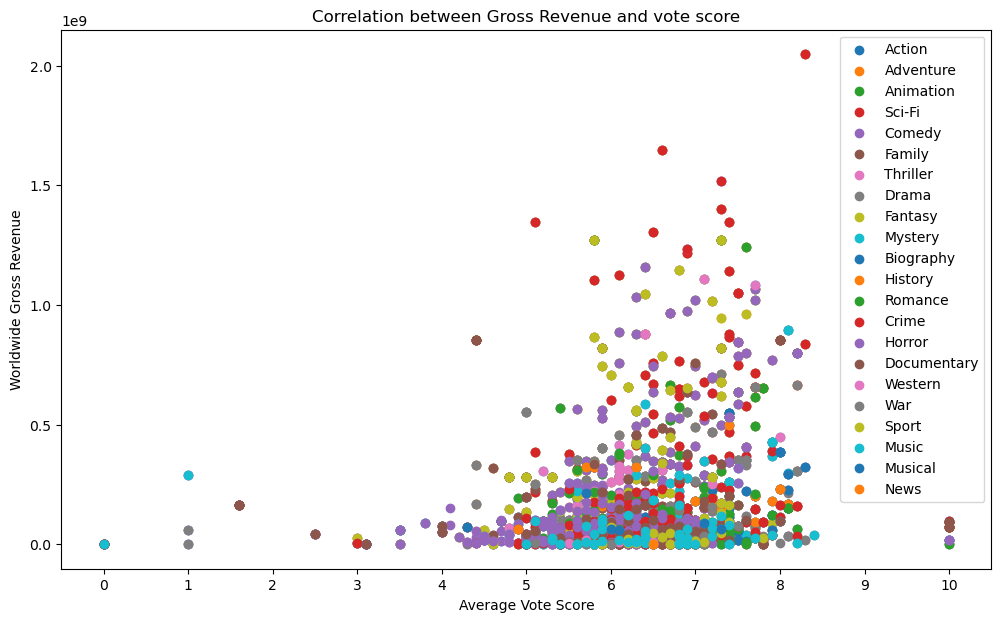

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
for genres in df_movie_explode['genres'].unique():
    subset_df = df_movie_explode[df_movie_explode['genres'] == genres]
    x = subset_df['vote_average']
    y = subset_df['worldwide_gross']
    
    ax.scatter(x,y)

    
ax.set_xlabel('Average Vote Score')
ax.set_ylabel('Worldwide Gross Revenue')
ax.set_xticks(np.arange(0,11,1))
ax.set_title('Correlation between Gross Revenue and vote score')
ax.legend(df_movie_explode['genres'].unique());

Similar as the popularity, there is an correlation between the vote score and gross revenue. The correlation is stronger when the movie vote score is between 4 and 8.5. We can confidently use worldwide gross revenue as another measure for the genre's success.

Now group the data by genres to see the average popularity score and average gross revenue per genre.

In [12]:
genre_average = df_movie_explode.groupby(['genres'])[['popularity','worldwide_gross']].mean()
genre_average = genre_average.reset_index()

In [13]:
genre_average

,genres,popularity,worldwide_gross
0,Action,16.213868,2.451212e+08
1,Adventure,17.760992,3.622733e+08
2,Animation,14.657526,3.871748e+08
3,Biography,11.370641,8.918469e+07
4,Comedy,11.692046,1.453128e+08
5,Crime,12.169525,9.152109e+07
6,Documentary,9.424076,9.958067e+07
7,Drama,10.547793,8.157516e+07
8,Family,12.149625,1.590037e+08
9,Fantasy,15.026856,2.220726e+08


Put the data into diagrams to improve the visualisation. 

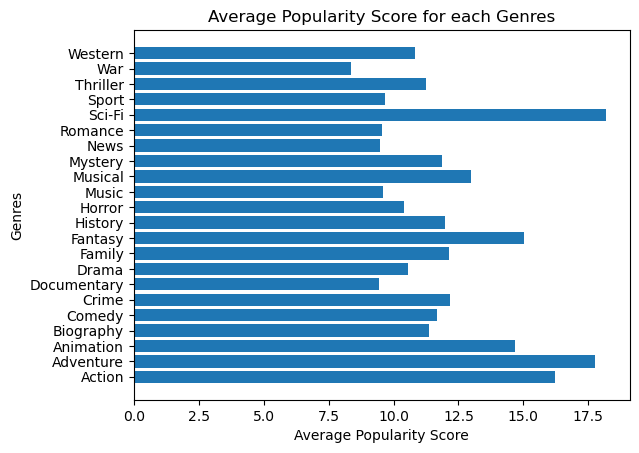

In [14]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['popularity']

ax.set_xlabel('Average Popularity Score')
ax.set_ylabel('Genres')
ax.set_title('Average Popularity Score for each Genres')

plt.barh(x,y);

Sci-fi has the highest score, followed by Adventure, Action, Fantasy and Amination. 

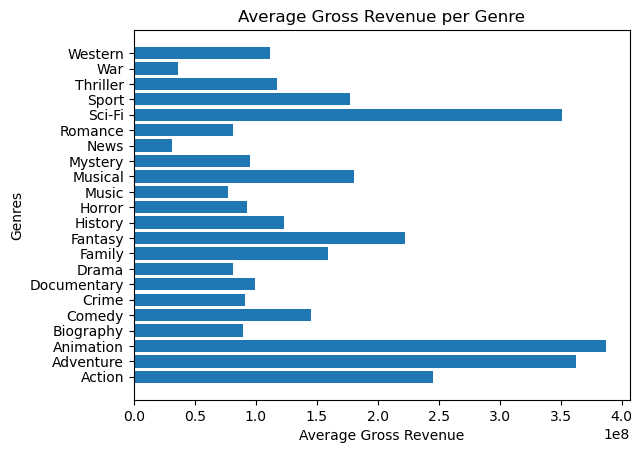

In [15]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['worldwide_gross']

ax.set_xlabel('Average Gross Revenue')
ax.set_ylabel('Genres')
ax.set_title('Average Gross Revenue per Genre')

plt.barh(x,y);

Animations hit an average 3.9m gross revenue globally, the highest among all genres, followed by Adventure and Sci-fi. News and War are the worst performing genres.

Put together the popularity score and the worldwide gross revenue, we can conclude that Animation, Sci-fi and adventures are the the most successful movie genres. This is likely due to the broad audieance that those genres get. To the opposite, News and War are the underperforming genres.

# Analysis II - How much profit can a movie make and what is the funding required to run a studio?

First examine the budget and profit from a per movie perspective.

In [16]:
df_movie.describe()

,Unnamed: 0,popularity,vote_average,production_budget,worldwide_gross,profit,release_year,release_month
count,2057.000000,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,1028.000000,11.712786,6.298396,4.279986e+07,1.388337e+08,2.661697e+07,2013.536704,7.219251
std,593.949072,7.969013,1.098674,5.323409e+07,2.226966e+08,7.800046e+07,4.118826,3.465794
min,0.000000,0.600000,0.000000,5.000000e+04,0.000000e+00,-1.449989e+08,1968.000000,1.000000
25%,514.000000,7.530000,5.800000,9.000000e+06,1.430493e+07,-6.860684e+06,2012.000000,4.000000
50%,1028.000000,10.406000,6.300000,2.500000e+07,5.789719e+07,1.614200e+06,2014.000000,8.000000
75%,1542.000000,14.800000,6.900000,5.000000e+07,1.589053e+08,3.490232e+07,2016.000000,10.000000
max,2056.000000,80.773000,10.000000,4.106000e+08,2.048134e+09,7.240671e+08,2018.000000,12.000000


Looking at the whole dataframe of ~2800 movies, on average, a movie can generate ~140m gross revenue on a production budget of 43m,returning ~27m profit to the studio. 

However, budget/profit may differ across the genres. Let's analyze the budget/profit by genres.

In [17]:
# Group the data by genres to analyze the average production budget and gross profit for a movie per genre.
genre_average = df_movie_explode.groupby(['genres'])[['production_budget','profit']].mean()
genre_average = genre_average.reset_index()

In [18]:
genre_average.sort_values(['production_budget','profit'], ascending =[False,False])

,genres,production_budget,profit
1,Adventure,1.087790e+08,7.235764e+07
2,Animation,9.852241e+07,9.506498e+07
17,Sci-Fi,9.330051e+07,8.208005e+07
0,Action,8.184542e+07,4.071516e+07
9,Fantasy,7.512727e+07,3.590905e+07
21,Western,5.994444e+07,-4.143774e+06
8,Family,5.676771e+07,2.273413e+07
13,Musical,5.302857e+07,3.712746e+07
10,History,4.830548e+07,1.320053e+07
4,Comedy,4.029319e+07,3.236320e+07


The data indicates that Adventure, Animation and Sci-fi, which are the most popular genres, also cost more to produce. Their production budget can reach the 100m mark. This could be driven by the sophistication of those movies that require significant investment in software, technology and high skilled labour. Nevertheless, those genres still make the most profit. 

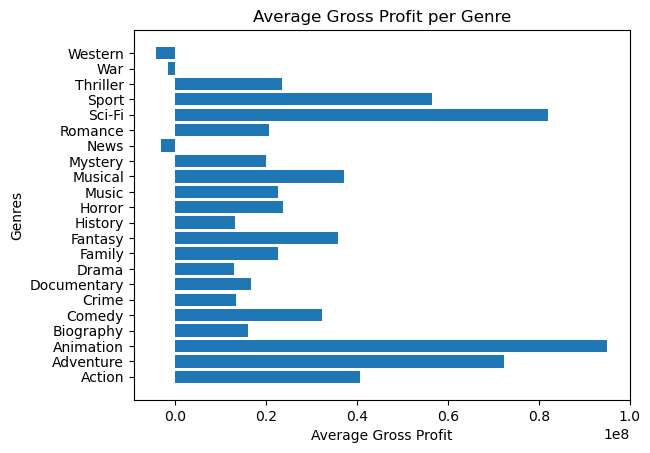

In [19]:
fig, ax = plt.subplots()
x = genre_average['genres']
y = genre_average['profit']

ax.set_xlabel('Average Gross Profit')
ax.set_ylabel('Genres')
ax.set_title('Average Gross Profit per Genre')

plt.barh(x,y);

The bar chart shows that Animation makes the highest profit, followed by Sci-fi, Adventure. This is aligned with our previous genre recommendation. Western, News and Wars are loss-making genres in general either due to low box office revenues or relatively high production cost. Those are the genres that Miscrsoft should avoid.  

Now let's examine the budgte/profit profile of a studio.

In [20]:
df_movie['release_year'].value_counts()

release_year
2015    315
2016    266
2011    252
2013    230
2010    212
2014    210
2017    200
2012    196
2018    149
1986     24
1968      2
2008      1
Name: count, dtype: int64

Movies before year 2010 are very sporatic. Those are old movies where the production budget are not quite relevant to the current age. Hence I decide to exclude them from the dataset for the yearly budget analysis.  

In [21]:
# remove the movies that are released before 2010.
df_movie_filter = df_movie.loc[df_movie['release_year']>=2010]

I'll pivot the datatable by years and by studio.

In [22]:
studio_movie_count = pd.pivot_table(df_movie_filter,index = 'studio', columns = 'release_year', values='title',aggfunc= 'count')

In [23]:
studio_movie_count

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
3D,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A24,NaN,NaN,NaN,2.0,6.0,5.0,8.0,7.0,3.0
ALP,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
ATO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affirm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
WB,16.0,14.0,18.0,10.0,15.0,20.0,12.0,18.0,16.0
WB (NL),4.0,5.0,3.0,5.0,4.0,16.0,11.0,10.0,12.0
WHE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 87 studios in toatl where most studios have a lot of missing values. Since I'm only interested in the top studios, I'll remove the studios with missing values.

Let's have a look how many movies are produced each year for a studio.

In [24]:
studio_movie_count = studio_movie_count.dropna()

In [25]:
studio_movie_count

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,11.0,17.0,10.0,10.0,14.0,16.0,14.0,8.0,8.0
Focus,4.0,16.0,4.0,5.0,5.0,2.0,21.0,3.0,4.0
Fox,19.0,20.0,17.0,20.0,15.0,33.0,17.0,16.0,9.0
FoxS,11.0,14.0,3.0,17.0,8.0,10.0,4.0,18.0,2.0
IFC,3.0,7.0,8.0,5.0,5.0,4.0,1.0,11.0,1.0
LGF,12.0,17.0,7.0,6.0,7.0,10.0,17.0,5.0,7.0
Par.,8.0,13.0,8.0,10.0,22.0,10.0,19.0,6.0,7.0
SGem,7.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0,4.0
Sony,11.0,12.0,10.0,8.0,5.0,16.0,16.0,10.0,5.0


In [26]:
studio_movie_count.describe()

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,10.833333,13.000000,10.083333,11.083333,10.416667,16.000000,13.833333,10.50000,8.333333
std,6.365151,5.134553,8.050503,9.139906,7.440165,14.516448,8.768055,6.03776,6.719488
min,3.000000,4.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.00000,1.000000
25%,6.250000,10.750000,3.750000,5.000000,5.000000,8.500000,9.250000,5.75000,4.000000
50%,11.000000,14.000000,8.000000,9.000000,7.500000,13.000000,15.000000,10.00000,7.000000
75%,13.000000,17.000000,11.750000,11.750000,15.000000,17.000000,17.500000,16.50000,9.750000
max,24.000000,20.000000,30.000000,35.000000,24.000000,53.000000,32.000000,19.00000,25.000000


The movie production varies among the 12 studios. However, by looking at the mean and median of the movie production in the recent couple of years, we can safety say that on average, a studio produce 7-10 movies each year. 

Let's have a look of the annual production budget of each studio.

In [27]:
studio_bud = pd.pivot_table(df_movie_filter,index = 'studio', columns = 'release_year', values='production_budget',aggfunc= 'sum').dropna()

In [28]:
studio_bud

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
studio,,,,,,,,,
BV,1.515000e+09,2.368600e+09,1.051000e+09,1.358000e+09,1.270800e+09,2.472600e+09,2.045000e+09,1.465000e+09,1.470900e+09
Focus,3.900000e+07,2.532000e+08,1.350000e+08,5.800000e+07,9.400000e+07,2.400000e+07,3.968000e+08,9.000000e+07,8.500000e+07
Fox,1.345500e+09,1.075000e+09,8.115000e+08,1.633000e+09,1.373000e+09,2.314500e+09,1.104000e+09,1.196000e+09,4.210000e+08
FoxS,1.385000e+08,1.635100e+08,1.280000e+07,1.883500e+08,8.980000e+07,1.300000e+08,3.600000e+07,2.270000e+08,2.500000e+07
IFC,1.705000e+07,7.040000e+07,1.509200e+08,2.625000e+07,5.100000e+07,1.670000e+08,1.000000e+07,2.250000e+07,4.000000e+07
LGF,3.517630e+08,4.441000e+08,3.365000e+08,2.435000e+08,3.100000e+08,5.360000e+08,3.250000e+08,1.180000e+08,1.790000e+08
Par.,5.090000e+08,1.070000e+09,2.280000e+08,1.090000e+09,1.392000e+09,1.890000e+08,1.100000e+09,5.630000e+08,2.630000e+08
SGem,2.475000e+08,1.240000e+08,1.070000e+08,8.000000e+07,2.400000e+07,4.100000e+07,3.800000e+07,7.500000e+07,5.600000e+07
Sony,7.780000e+08,6.960000e+08,8.940000e+08,6.830000e+08,4.150000e+08,1.250000e+09,9.330000e+08,6.090000e+08,2.620000e+08


In [29]:
studio_bud.describe()

release_year,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,6.664427e+08,6.864925e+08,5.521850e+08,7.780917e+08,5.692583e+08,8.813500e+08,6.609000e+08,6.643750e+08,5.283250e+08
std,6.360971e+08,6.499796e+08,4.680629e+08,7.269466e+08,5.330711e+08,8.929206e+08,6.088057e+08,6.978598e+08,6.462925e+08
min,1.705000e+07,7.040000e+07,1.280000e+07,2.625000e+07,2.400000e+07,2.400000e+07,1.000000e+07,2.250000e+07,2.500000e+07
25%,1.928750e+08,1.991275e+08,1.469400e+08,1.612625e+08,9.295000e+07,1.577500e+08,1.610000e+08,1.110000e+08,7.775000e+07
50%,4.303815e+08,5.700500e+08,3.677500e+08,6.085000e+08,3.625000e+08,5.510500e+08,5.904000e+08,4.565000e+08,2.625000e+08
75%,1.023375e+09,9.510500e+08,9.332500e+08,1.221500e+09,1.000950e+09,1.378000e+09,9.927500e+08,1.022000e+09,6.250000e+08
max,1.929000e+09,2.368600e+09,1.290000e+09,2.267000e+09,1.392000e+09,2.472600e+09,2.045000e+09,2.293000e+09,1.939000e+09


Annual production budget also varies between studios. On an average basis, we can safely say that a studio need to invest ~500m every year in movie production.

By looking at 12 studios of the number of movies they produced each year and the annual production budget in the last 9 years, it shows that a studio needs average 530m budget to produce 7-10 movies averagely each year.

Microsoft can use this data insight to plan their budget and their movie production. For example, if the management decide to invest in Animation, Sci-fi and Adventures only, they could probably produce 5-8 movies on a 500m budget. If they want to mix with other genres, they could probably produce 7-10 movies a year. 

# Analysis III - What is the best month to release a movie?

I use the movie dataset excluding the old years' release for this analysis as the last 10 years data are more relevant.

In [30]:
# Grouping the data by month.
rev_month = df_movie_filter.groupby(['release_month'])['worldwide_gross'].mean()
rev_month = rev_month.reset_index()

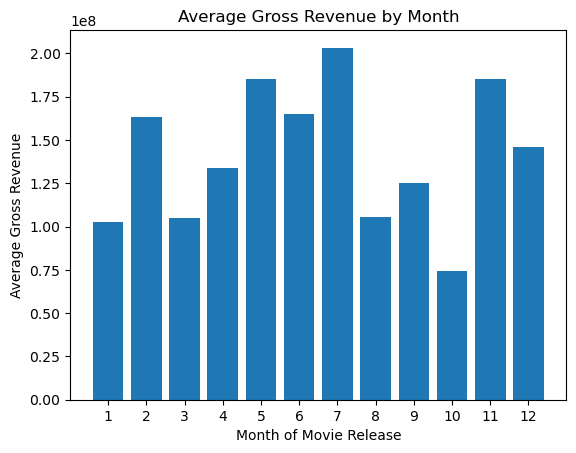

In [32]:
fig, ax = plt.subplots()

x= rev_month['release_month']
y= rev_month['worldwide_gross']

ax.set_xlabel('Month of Movie Release')
ax.set_ylabel('Average Gross Revenue')
ax.set_title('Average Gross Revenue by Month')
ax.set_xticks(np.arange(0,13,1))

plt.bar(x,y);

The data indicates that July or broadly May to July is the best time to release movie, followed by November. This seasonality can be attributed to the school holiday.  Also, Academy Awards could be another factor - studios try to release the movies by end of the year in order to be eligible for the Academy Awards entry at he begining of the coming year.

## Conclusions
Three insights generated from the above analysis:
* The best genres to chose are a mix of Animation, Sci-fi and Adventures as it gets the largest viewers and hit the highest box office revenue, potentially due to the broad audiences it received. Those genres also make the highest profit - averagely above 70m, more than double the profit an average movie made. To the contrast, News, Wars and Western are the genres that should be avoided as they generally have limited audience, low box office revenue and are loss-making.
* While Animation, Sci-fi and Adventures generate the highest box office revenue, the production cost is also very high. Microsoft will need to consider how much funding or budget they are planning to invest in the stuio business. Looking at the current movie production market, a studio invests averagely 0.5m into their production budget that creates averagely 7-10 movies each year. Miscrosoft can use this as a benchmark to develop their annual production plan.
* Box Office performance shows a strong seasonality. Looking into the last ten years' data, May to July are the best period to release movies followed by November.This could primarily driven by the school holiday. On top of that, the Academy Awards could also have an impact on the timing of release. While there are various factiors that could influence the result, it is advisable that Miscrosoft leverage this seasonality insight to plan the movie production.

***
Limitation of the Analysis:
* There are other factors that will impact a movie's success. For exmaple, the cast, producers and directors are not covered in this analysis. The runtime is another factor that is not in the scope of this analysis. Finally, from a financial success perspective, the data in this analysis only consider the box office revenue and production budget. There are other costs, such as marketing, distribution as well as other sources of revenue, such as streaming, DVD, etc. should be considered for a full-fledged financial analysis.
***

Nest Steps:
* Once Miscrosoft decided the genres, it is recommended that they start to look at the most popular producers, directors and the cast in their selected movie genres. Then they can revisit their budget to shortlist the producers, directors and the cast.
* Once they release their first movie, Microsoft can use the new data to re-run this analysis to obtain new insights for their future movie productions. 

In [31]:
rev_month

,release_month,worldwide_gross
0,1,1.027565e+08
1,2,1.633399e+08
2,3,1.046333e+08
3,4,1.339862e+08
4,5,1.854141e+08
5,6,1.649907e+08
6,7,2.032089e+08
7,8,1.056291e+08
8,9,1.249734e+08
9,10,7.452787e+07
